In [10]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dropout

In [11]:
import pathlib
dataset_url = "C:/Users/dell/Desktop/final project/dataset"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url)
data_dir = pathlib.Path(dataset_url)

In [12]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

77700


In [13]:
batch_size = 32
img_height = 64
img_width = 64

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 77700 files belonging to 37 classes.
Using 54390 files for training.


In [15]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 77700 files belonging to 37 classes.
Using 23310 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['BA', 'BHA', 'CA', 'CHA', 'DA', 'DAA', 'DHA', 'DHAA', 'GA', 'GHA', 'GYA', 'HA', 'JA', 'JHA', 'KA', 'KHA', 'KSHA', 'LA', 'MA', 'NA', 'NAA', 'NGA', 'NYA', 'PA', 'PHA', 'RA', 'SA', 'SHA', 'SHAA', 'SHRA', 'TA', 'TAA', 'THA', 'THAA', 'TRA', 'WA', 'YA']


# Visualize the data

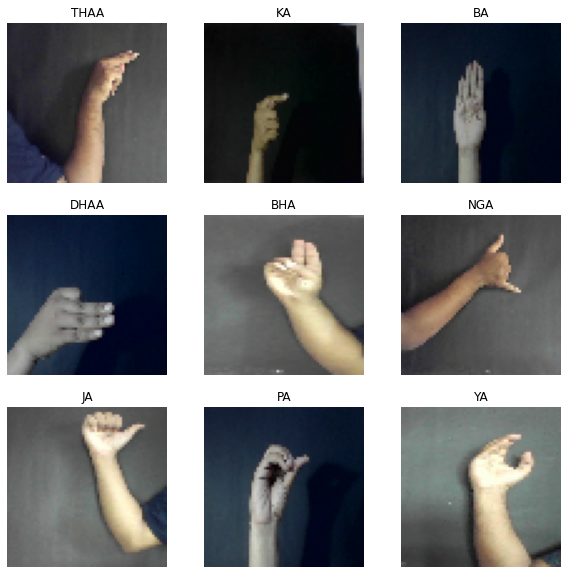

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [18]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 64, 64, 3)
(32,)


# Configure the dataset for performance

In [19]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Standardize the data

In [20]:
normalization_layer = layers.Rescaling(1./255)
# normalization_layer = layers.Rescaling(1./127.5,offset=-1)

In [21]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.8068628


In [22]:
# This model is for testing only

# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
# print("Packages imported...")

In [23]:
# Model for testing
# model = Sequential()

# model.add(Conv2D(16, (5, 5), input_shape=(64, 64, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.5))

# new
# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.5))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.5))

# model.add(Conv2D(128, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.5))

# model.add(Flatten())

# model.add(Dense(128, activation='relu'))

# model.add(Dense(29, activation='softmax'))

# model.summary()

# Create the model

In [24]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

# # build a sequential model
# model = Sequential()
# model.add(InputLayer(input_shape=(64, 64, 3)))

# # 1st conv block
# model.add(Conv2D(25, (5, 5), activation='relu', padding='same'))
# model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# # 2nd conv block
# model.add(Conv2D(50, (5, 5), activation='relu', padding='same'))
# model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# model.add(BatchNormalization())
# # 3rd conv block
# model.add(Conv2D(70, (3, 3), activation='relu', padding='same'))
# model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
# model.add(BatchNormalization())
# # ANN block
# model.add(Flatten())
# model.add(Dense(units=100, activation='relu'))
# model.add(Dense(units=100, activation='relu'))
# model.add(Dropout(0.25))
# # output layer
# model.add(Dense(units=10, activation='softmax'))

In [25]:
# Actual Tensorflow model
num_classes = len(class_names)

model = Sequential([
#   layers.Rescaling(1./127.5,offset=-1, input_shape=(img_height, img_width, 3)),
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16,5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
#   layers.Dropout(0.5),
    
  layers.Conv2D(32, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
#   layers.BatchNormalization(),
#   layers.Dropout(0.5),
    
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
#      layers.Dropout(0.5),
#     layers.BatchNormalization(),
    
  layers.Conv2D(128, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
#     layers.BatchNormalization(),
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
     layers.Dropout(0.5),
  layers.Dense(29, activation='softmax'),
      layers.Dropout(0.5),
         
  

#   layers.Dense(29, activation='softmax'),
#   layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        5

In [28]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ReduceLROnPlateau(monitor='loss', patience=2, cooldown=0), EarlyStopping(monitor='accuracy', min_delta=1e-4, patience=2)]

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
    callbacks=callbacks
)

Epoch 1/10
 616/1700 [=========>....................] - ETA: 3:52 - loss: 3.5053 - accuracy: 0.0441

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

sunflower_path =  "C:/Users/dell/Desktop/KA.2b1ec07e-319d-11ed-9ec5-d81265037738.jpg"

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [ ]:
# model.save("01.h5")

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import os

In [ ]:
# sunflower_url = "C:/Users/atulp/OneDrive/Desktop/eval/DAA/"
directory = "D:/finalproject/test/collectedimages/KA/"
uniq_labels = sorted(os.listdir(directory))
images = []
labels = []
for idx, label in enumerate(uniq_labels):
    for file in os.listdir(directory ):
        filepath = directory+ "/" + file
#             image = cv2.imread(filepath)
#             images.append(image)
#             labels.append(idx)
#     images = np.array(images)
#     labels = np.array(labels)

        img = tf.keras.utils.load_img(
                filepath)
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch
        print(uniq_labels)
        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])

        print(
                "This image most likely belongs to {} with a {:.2f} percent confidence."
                .format(class_names[np.argmax(score)], 100 * np.max(score))
            )

In [ ]:
predict_data=model.predict(X_test)
predictions = np.argmax(predict_data,axis=1)
print("Predictions done...")
from sklearn.metrics import classification_report, confusion_matrix
y_tests=np.argmax(y_test,axis=1)
print(classification_report(y_tests , predictions))